
# 5.9: Reheat Cycle

## Problem statement
a) Consider a steam cycle where water is pumped from room pressure and temperature ($T_1=25\:^{\circ}C$ & $P_1=101\:kPa$) iseontropically to $P_2=1\:MPa$. Water then is heated in a bolier in a constant pressure to a maximum temperature of $T_3=600\:^{\circ}C$ which is limited by the metallurgical consederations of the turbine. Steam then is expanded iseontrepically in the turbine before entering the constant-pressure condenser. Calculate the efficiency of the cycle.

![CH5-Q13_1.png](./CH5-Q13_1.png)

b) to increase the efficiency of the cycle, a reheat mechanism is proposed where the turbine is downsized to expand to a higher pressure at a primary step ($P_5=650\:kPa$) before being sent back to the boiler to reheat to $T_6=600\:^{\circ}C$ at a constant pressure. The reheated steam is then used in a second iseontropic turbine to expand to the room pressure before entering the condenser. Calculate the efficiency of the modified cycle.

![CH5-Q13_2.png](CH5-Q13_2.png)

c) optimize the medium pressure to maximize the efficiency

## Solution Approach for a)

The pump is iseotropic, therefore

$s_2 = s_1$

which is used to calculate ethalpy at the second state ($h_2$)

and for the turbine again,

$s_4=s_3$

which is used to calculate the enthalpy at state #4 ($h_4$)

the efficiency is calculated by

$\eta=w/q_H=(w_{turbine}-w_{pump})/q_H$

where for work from the turbine

$w_{turbine}=h_3-h_4$

and

$w_{pump}=h_2-h_1$

and from the boiler

$q_H=h_3-h_2$

In [1]:
#importing the required library
import CoolProp.CoolProp as CP
fluid = 'water'
P_1 = 101E+3   #P1 in Pa
T_1 = 25 + 273.15   #T1 in K
s_1 = CP.PropsSI("S", "P", P_1, "T", T_1 , fluid)   #entropy in state#1 in J/kg.K
h_1 = CP.PropsSI("H", "P", P_1, "T", T_1 , fluid)   #enthalpy in state#1 in J/kg

s_2 = s_1   #iseontropic pump
P_2 = 1E+6   #pressure in state #2 in Pa
h_2 = CP.PropsSI("H", "P", P_2, "S", s_2 , fluid)   #enthalpy in state#2 in J/kg

P_3 = P_2   #constant pressure boiler
T_3 = 600 + 273.15   #temperature at state #3 in K
s_3 = CP.PropsSI("S", "P", P_3, "T", T_3 , fluid)   #entropy in state#3 in J/kg.K
h_3 = CP.PropsSI("H", "P", P_3, "T", T_3 , fluid)   #enthalpy in state#3 in J/kg

s_4 = s_3   #iseontropic turbine
P_4 = P_1   #constant pressure condenser
h_4 = CP.PropsSI("H", "P", P_4, "S", s_4 , fluid)   #enthalpy in state#4 in J/kg

w_turbine = h_3 - h_4   #work output from turbine in J/kg
w_pump = h_2 - h_1   #work output in pump in J/kg
w = w_turbine - w_pump   #net work output in J/kg

q_H = h_3 - h_2   #heat input in boiler in J/kg

etha = w / q_H   #overall efficiency of the cycle

print('Theefficiency of the cycle is:', f"{etha*100:.1f}", '%')

Theefficiency of the cycle is: 20.1 %


## Solution Approach for b)

both turbines are iseontropic, so

$s_5=s_3$

and

$s_4=s_6$

The work output for the turbines would be

$w_{turbine}=w_{turbine1}+w_{turbine2}=(h_3-h_5)+(h_6-h_4)$

and the heat input

$q_h=q_{h-boiler}+q_{h-reheat}=(h_3-h_2)+(h_6-h_5)$

In [2]:
s_5 = s_3   #iseontropic turbine
P_5 = 750E+3   #constant pressure condenser
h_5 = CP.PropsSI("H", "P", P_5, "S", s_5 , fluid)   #enthalpy in state#5 in J/kg

P_6 = P_5   #constant pressure reheat
T_6 = 600 + 273.15   #temperature at state #6 in K
s_6 = CP.PropsSI("S", "P", P_6, "T", T_6 , fluid)   #entropy in state#6 in J/kg.K
h_6 = CP.PropsSI("H", "P", P_6, "T", T_6 , fluid)   #enthalpy in state#6 in J/kg

s_4 = s_6   #iseontropic turbine
P_4 = P_1   #constant pressure condenser
h_4 = CP.PropsSI("H", "P", P_4, "S", s_4 , fluid)   #enthalpy in state#4 in J/kg

w_turbine = (h_3 - h_5) + (h_6 - h_4)   #turbines work output in J/kg
w = w_turbine - w_pump   #net work output in J/kg
q_H = (h_3 - h_2) + (h_6 - h_5)   #total heat input in J/kg

etha = w / q_H #overall efficiency of the cycle

print('Theefficiency of the cycle with reheat is:', f"{etha*100:.1f}", '%')

Theefficiency of the cycle with reheat is: 20.6 %


## Solution Approach for c)

Text(0.5, 0, 'Medium Pressure [kPa]')

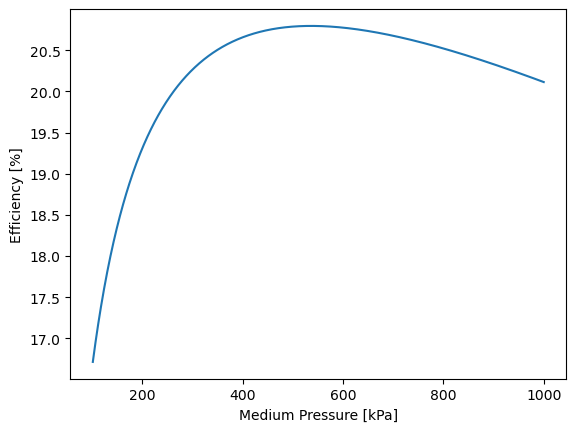

In [3]:
import numpy as np
import matplotlib.pyplot as plt

s_5 = s_3   #iseontropic turbine
P_vals = np.linspace(P_1, P_2, 1000)   #an array of pressures between two ends in Pa
etha = np.zeros(1000)   #empty array to store efficiency values

i = 0   #counter for the for loop
for P_5 in P_vals:
    h_5 = CP.PropsSI("H", "P", P_5, "S", s_5 , fluid)    #enthalpy in state#5 in J/kg
    
    P_6 = P_5   #constant pressure reheat
    T_6 = 600 + 273.15   #temperature at state #6 in K
    s_6 = CP.PropsSI("S", "P", P_6, "T", T_6 , fluid)   #entropy in state#6 in J/kg.K
    h_6 = CP.PropsSI("H", "P", P_6, "T", T_6 , fluid)   #enthalpy in state#6 in J/kg

    s_4 = s_6   #iseontropic turbine
    P_4 = P_1   #constant pressure condenser
    h_4 = CP.PropsSI("H", "P", P_4, "S", s_4 , fluid)   #enthalpy in state#4 in J/kg

    w_turbine = (h_3 - h_5) + (h_6 - h_4)   #turbines work output in J/kg
    w = w_turbine - w_pump   #net work output in J/kg
    q_H = (h_3 - h_2) + (h_6 - h_5)   #total heat input in J/kg
    
    etha[i] = w / q_H #overall efficiency of the cycle
    i = i + 1


plt.plot(P_vals/1000,etha*100)
plt.ylabel("Efficiency [%]")  # give y axis a label
plt.xlabel("Medium Pressure [kPa]")  # give x axis a label